# Grid Graph Metamandering

In this notebook I want to run expirments metamandering on a grid graph using lorenzo's code to gain intuition about whats happening in the code, then I will refactor his code and impement on real data

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

def two_direction_diagonals(m,width):
    #This is where the grid with the diagonals gets made 
    #So maybe just try changing the n[1] bounds so that it fills up more from top to bottom? 
    n = 6 * m 
    G = nx.grid_graph([6 * m, 6 * m]) #The 6 is just to ensure that certain values are integers, such as (1/2)( 6m) or (1/3)(6m)
    x_start_boundary = 0
    x_left_midpoint = width * m - 1
    x_right_midpoint = (6 - width) * m - 1
    x_end_boundary = 6 * m - 2
    y_start_boundary = 2 * m
    y_end_boundary = 4 * m
    for n in G.nodes():
        if n[0] % 2 == 0:
            if ((x_start_boundary <= n[0] <= x_left_midpoint or x_right_midpoint <= n[0] <= x_end_boundary) 
                and y_start_boundary - 1 <= n[1] <= y_end_boundary):
                G.add_edge(n, (n[0] + 1, n[1] + 1))
        if n[0] % 2 == 1:
            if ((x_start_boundary <= n[0] <= x_left_midpoint or x_right_midpoint <= n[0] <= x_end_boundary) 
                and y_start_boundary <= n[1] <= y_end_boundary + 1):
                G.add_edge(n, (n[0] + 1, n[1] - 1))
        G.node[n]['pos'] = (n[0], n[1])
    nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), node_size = 1, width = 1, cmap=plt.get_cmap('jet'))
    return G
#This function takes in a integer parameter m, and creates a 6*m by 6*m graph. Then the function using the 
#width parameter to determine the size of the queen adjacency components
#The 6 is just to ensure that certain values are integers, such as (1/2)(6m) or (1/3)(6m)
#Function creates diagonals from (x, y) to (x+1,y+1). Not to 
def one_direction_diagonals(m, width):
    G = nx.grid_graph([6 * m, 6 * m])
    x_start_boundary = 0
    x_left_midpoint = width * m - 1
    x_right_midpoint = (6 - width) * m - 1
    x_end_boundary = 6 * m - 2
    y_start_boundary = 2 * m
    y_end_boundary = 4 * m
    for n in G.nodes():
        if ((x_start_boundary <= n[0] <= x_left_midpoint or x_right_midpoint <= n[0] <= x_end_boundary) 
        and y_start_boundary <= n[1] <= y_end_boundary):
            G.add_edge(n, (n[0] + 1, n[1] + 1))
        G.node[n]['pos'] = (n[0], n[1])
    nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), node_size = 1, width = 1, cmap=plt.get_cmap('jet'))
    return G

if i need to plot graph again, here is code to do so. place in function. #nx.draw(G, pos=nx.get_node_attributes(graph, 'pos'), node_size = 1, width = 1, cmap=plt.get_cmap('jet'))

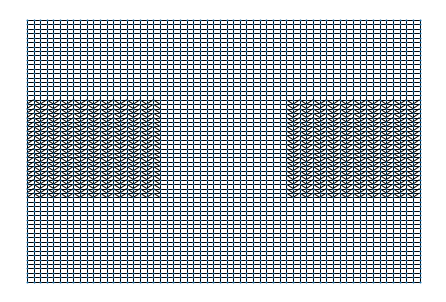

In [32]:
G = two_direction_diagonals(10,2)


In [15]:
G

In [ ]:
steps = 10
ns = 1
chaintype = "uniform_tree"
diagonal_bias = "two-diagonal"
for chaintype in ["uniform_tree", "tree"]:
    #w as defined in paper 
    widths = [0,1,2,3]
    for p in [.6]:
        # proportion is what percent of voters is party one 
        proportion = p * 6
        for width in widths:
            # cross pattern within added bridge(better name needed)
            if diagonal_bias == "two-diagonal":
                graph = one_direction_diagonals(m,width)
            if diagonal_bias == "one-diagonal":
                graph = two_direction_diagonals(m,width)
            #draws graph without bridge added 
            plt.figure()
            nx.draw(graph, pos=nx.get_node_attributes(graph, 'pos'), node_size = 1, width = 1, cmap=plt.get_cmap('jet'))
            plt.savefig("./plots/" + "Size:" + str(m) + "WIDTH:" + str(width) + "Bias:" + str(diagonal_bias) +  "UnderlyingGraph.eps", format='eps')
            plt.close()
            #this will be used to create the starting assignment, which is the partition with horizontal cut
            #Note: This is a gerrymandered plan for both the vertical and horizontal voting patterns, although in different partisan directions
            horizontal = []
            for x in graph.nodes():
                if x[1] < 3 * m :
                    horizontal.append(x)
            vertical = []
            for x in graph.nodes():
                if x[1] < 3 * m:
                    vertical.append(x)

            #dictioanry for the starting plan
            cddict = {} 
            start_plans = [horizontal,vertical] # can contain different voting alignments 
            alignment = 0 # pick alignment. In this case, it is horizontal.
            
            #Horizontal contains the nodes in the bottom 50 percent of the graph
            #This makes the starting assignment: 

            #Note: This plan immediately gets thrown away by chain, its just to give a starting position

            for n in graph.nodes():
                if n in start_plans[alignment]:
                    cddict[n] = 1
                else:
                    cddict[n] = -1

            #This initializes the most important statistics
            for edge in graph.edges():
                graph[edge[0]][edge[1]]['cut_times'] = 0

            for n in graph.nodes():
                graph.node[n]["population"] = 1 #This is something gerrychain will refer to for checking population balance
                graph.node[n]["part_sum"] = cddict[n] #Tis will keep track of the average districtr of a node
                graph.node[n]["last_flipped"] = 0
                graph.node[n]["num_flips"] = 0

                #This tells us the boundary of the grid graph n[0] is the x coordinate
                if n[0] == 0 or n[0] == m - 1 or n[1] == m or n[1] == -m + 1:
                    graph.node[n]["boundary_node"] = True
                    graph.node[n]["boundary_perim"] = 1

                else:
                    graph.node[n]["boundary_node"] = False


            print("CONFIGURE UPDATERS")

            def new_base(partition):
                return base


            def step_num(partition):
                parent = partition.parent

                if not parent:
                    return 0

                return parent["step_num"] + 1

            #bnodes is the set of boundary nodes
            bnodes = [x for x in graph.nodes() if graph.node[x]["boundary_node"] == 1]


            def bnodes_p(partition):
                return [x for x in graph.nodes() if graph.node[x]["boundary_node"] == 1]

            #Gerrychian stuff
            updaters = {'population': Tally('population'),
                        "boundary": bnodes_p,
                        'cut_edges': cut_edges,
                        'step_num': step_num,
                        'b_nodes': b_nodes_bi,
                        'base': new_base,
                        'geom': geom_wait,
                        # "Pink-Purple": Election("Pink-Purple", {"Pink":"pink","Purple":"purple"})
                        }

            print("BUILD PARTITION")

            #Makes the horizontal partition of the grid graph based on the dictionary cddict from before
            grid_partition = Partition(graph, assignment=cddict, updaters=updaters)
            pop1 = .05

            base = 1
            # ADD CONSTRAINTS

            #defines how we do population balance constraint
            popbound = within_percent_of_ideal_population(grid_partition, pop1)
            
            ##plt.figure()
            #nx.draw(graph, pos={x: x for x in graph.nodes()}, node_size=ns,
            #plt.savefig("./plots/" + str(alignment) + "SAMPLES:" + str(steps) + "Size:" + str(m) + "WIDTH:" + str(width) + "chaintype:" +str(chaintype) +    "B" + str(int(100 * base)) + "P" + str(
            #    int(100 * pop1)) + "start.eps", format='eps')
            #plt.close()

            print("Setup Proposal")

            #this is the ideal population to aim for 
            ideal_population = sum(grid_partition["population"].values()) / len(grid_partition)

            tree_proposal = partial(recom,
                                    pop_col="population",
                                    pop_target=ideal_population,
                                    epsilon=0.05,
                                    node_repeats=1
                                    )

            print("BUILD MARKOV CHAINS")
            if chaintype == "flip":
                exp_chain = MarkovChain(slow_reversible_propose_bi,
                                        Validator([single_flip_contiguous, popbound  # ,boundary_condition
                                                   ]), accept=cut_accept, initial_state=grid_partition,
                                        total_steps=steps)


            if chaintype == "tree":
                tree_proposal = partial(recom, pop_col="population", pop_target=ideal_population, epsilon=0.05,
                                        node_repeats=1, method=my_mst_bipartition_tree_random)

                exp_chain = MarkovChain(tree_proposal,
                                        Validator([popbound  # ,boundary_condition
                                                   ]), accept=cut_accept, initial_state=grid_partition,
                                        total_steps=steps)

            if chaintype == "uniform_tree":
                #tree_proposal = partial(uniform_tree_propose)
                tree_proposal = partial(recom, pop_col="population", pop_target=ideal_population, epsilon=0.05,
                                        node_repeats=1, method=my_uu_bipartition_tree_random)

                exp_chain = MarkovChain(tree_proposal,
                                        Validator([popbound  # ,boundary_condition
                                                   ]), accept=cut_accept, initial_state=grid_partition,
                                        total_steps=steps)

            print("Run MARKOV CHAINS")


            #IGNORE:
            rsw = []
            rmm = []
            reg = []
            rce = []
            rbn = []
            waits = []

            import time

            st = time.time()

            t = 0
            seats = [[],[]]
            vote_counts = [[],[]]
            old = 0
            #skip = next(exp_chain)
            #skip the first partition
            k = 0
            num_cuts_list = []
            #/IGNORE


            for part in exp_chain:
                print("step")
                if k > 0:
                    #if part.assignment == old:
                    #    print("didn't change")

                    #This block just keeps track of some statistics one might care about, but they are not important
                    rce.append(len(part["cut_edges"]))
                    waits.append(part["geom"])
                    rbn.append(len(list(part["b_nodes"])))
                    num_cuts = len(part["cut_edges"])
                    num_cuts_list.append(num_cuts)


                    #This part updates the number of times cut counter that each edge has
                    for edge in part["cut_edges"]:
                        graph[edge[0]][edge[1]]["cut_times"] += 1
                        # print(graph[edge[0]][edge[1]]["cut_times"])

                    #This will keep track of the average district
                    if part.flips is not None:
                        f = list(part.flips.keys())[0]
                        graph.node[f]["part_sum"] = graph.node[f]["part_sum"] - dict(part.assignment)[f] * (
                            abs(t - graph.node[f]["last_flipped"]))
                        graph.node[f]["last_flipped"] = t
                        graph.node[f]["num_flips"] = graph.node[f]["num_flips"] + 1

                    #i will counting one of two scenarious , 
                    # the two different ways to distribute the 60 percent party 1 population
                    for i in [0, 1]:

                        top = []
                        bottom = []
                        for n in graph.nodes():
                            if part.assignment[n] == 1:
                                #Are you assigned to the first district?
                                top.append( int(n[i] < proportion*m))
                                #Converts truth statement "in party 0" into an integer that it adds
                            if part.assignment[n] == -1:
                                bottom.append( int( n[i] < proportion*m))

                        top_seat = int(np.mean(top) > .5)
                        #This votes -- [0,0,1] take mean is < .5 , so 0 wins
                        bottom_seat = int(np.mean(bottom) > .5)
                        total_seats = top_seat + bottom_seat
                        #The total number of seats 
                        seats[i].append(total_seats)
                    #old = part.assignment
                t += 1
                k += 1


            #Now chain is over

            print("average cut size:", np.mean(num_cuts_list))
            f = open("./plots/" + str(alignment) + "SAMPLES:" + str(steps) + "Size:" + str(m) + "chaintype:" + str(chaintype) + "Bias:" + str(diagonal_bias) + "P" + str(
                int(100 * pop1)) + "proportion:" + str(p) + "edges.txt", 'a')

            means = np.mean(seats,1)
            stds = np.std(seats,1)

            f.write( str( means[0] ) + "(" + str(stds[0]) + ")," + str( means[1] ) + "(" + str(stds[1]) + ")" + "at width:" + str(width) + '\n')

            #f.write("mean:" +  str(np.mean(seats,1)) + "var:" + str(np.var(seats,1)) + "stdev:" + str(np.std(seats,1)) +  "at width:" + str(width) + '\n' )

            f.close()
            print(str( means[0] ) + "(" + str(stds[0]) + ")" + str( means[1] ) + "(" + str(stds[1]) + ")" )
            #print(seats)


            #This block makes the green edge figures:
            plt.figure()
            nx.draw(graph, pos={x: x for x in graph.nodes()}, node_color=[0 for x in graph.nodes()], node_size=1,
                    edge_color=[graph[edge[0]][edge[1]]["cut_times"] for edge in graph.edges()], node_shape='s',
                    cmap='magma', width=3)
            plt.savefig("./plots/" + str(alignment) + "SAMPLES:" + str(steps) + "Size:" + str(m) + "WIDTH:" + str(width) + "chaintype:" +str(chaintype) +  "Bias:" + str(diagonal_bias) +  "P" + str(
                int(100 * pop1)) + "edges.eps", format='eps')
            plt.close()






            A2 = np.zeros([6 * m, 6 * m])
            for n in graph.nodes():
                #print(n[0], n[1] - 1, dict(part.assignment)[n])
                A2[n[0], n[1]] = dict(part.assignment)[n]

            plt.figure()
            plt.imshow(A2, cmap = 'jet')
            plt.axis('off')
            plt.savefig("./plots/" + "Size:" + str(m) + "WIDTH:" + str(width) + "chaintype:" +str(chaintype) + "Bias:" + str(diagonal_bias) + "P" + str(
                int(100 * pop1)) + "sample_partition.eps", format='eps')
            plt.close()

            #plt.figure()
            #plt.hist(seats)